# Question 8

## Low Pass Filtering using Fourier Transfrom

## <b>Part 1</b>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

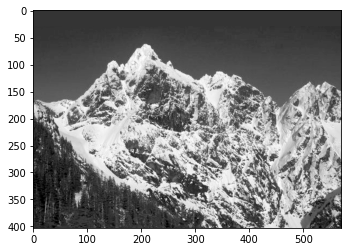

In [2]:
img = cv2.imread("images/mountain.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

![image.png](assets/FFT1D.png)

In [3]:
def FFT1D(a):
    if a.shape[0]==1:
        return a
    a_odd = a[1::2]
    a_even = a[::2]
    F_odd = FFT1D(a_odd)
    F_even = FFT1D(a_even)
    aFFT = np.zeros(a.shape[0],dtype='complex64')
    out = np.zeros(a.shape[0]//2,dtype='complex64')
    R = np.arange(a.shape[0]//2)
    out = np.exp(-2j*np.pi*R/a.shape[0])
    aFFT[:a.shape[0]//2] = F_even + out*F_odd
    aFFT[a.shape[0]//2:] = F_even - out*F_odd
    return aFFT.astype('complex64')

In [4]:
def FFT2D(a):
    if a.shape[0]==1:
        return a
    flag1 = abs(np.log2(a.shape[0]) - int(np.log2(a.shape[0])))
    flag2 = abs(np.log2(a.shape[1]) - int(np.log2(a.shape[1])))
    #Row Case
    if flag1!=0:
        #Add zeros
        r_zero = np.zeros((int(2**(np.ceil(np.log2(a.shape[0]))))-a.shape[0],a.shape[1]))
        a = np.append(a,r_zero,axis=0)
    #Col Case
    if flag2!=0:
        #Add zeros
        c_zero = np.zeros((a.shape[0],int(2**(np.ceil(np.log2(a.shape[1]))))-a.shape[1]))
        a = np.append(a,c_zero,axis=1)
    
    out = np.zeros_like(a,dtype='complex64')
    #Row-Wise
    for i in range(a.shape[0]):
        out[i] = FFT1D(a[i])
    #Col-Wise
    for i in range(out.shape[1]):
        out[:,i] = FFT1D(out[:,i])

    return out

In [5]:
def LPF(img,D):
    filt = np.zeros_like(img,dtype='int')
    filD = filt.copy()
    R,C = np.shape(img)
    
    for r in range(R):
        for c in range(C):
            filD[r,c] = np.sqrt(r**2 + c**2)
    
    for i in range(R):
        for j in range(C):
            val = filD[np.abs(i - (img.shape[0]//2)),np.abs(j - (img.shape[1]//2))]
            filt[i,j] = val<=D
    return filt

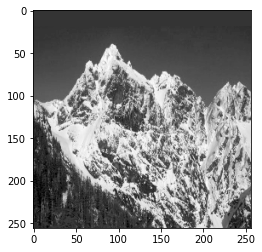

In [6]:
imgg = cv2.resize(img,(256,256),cv2.INTER_AREA)
plt.imshow(imgg,cmap='gray')

In [7]:
out = FFT2D(imgg)

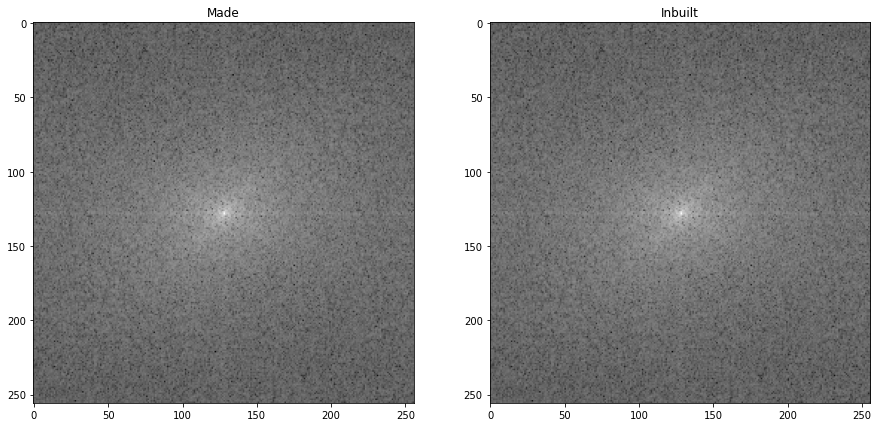

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(np.log(1 + np.abs(np.fft.fftshift(out))), cmap='gray')
axs[0].title.set_text('Made')
axs[1].imshow(np.log(1 + np.abs(np.fft.fftshift(np.fft.fft2(imgg)))), cmap='gray')
axs[1].title.set_text('Inbuilt')

In [9]:
L15 = LPF(np.fft.fftshift(out),15)
L30 = LPF(np.fft.fftshift(out),30)
L50 = LPF(np.fft.fftshift(out),50)

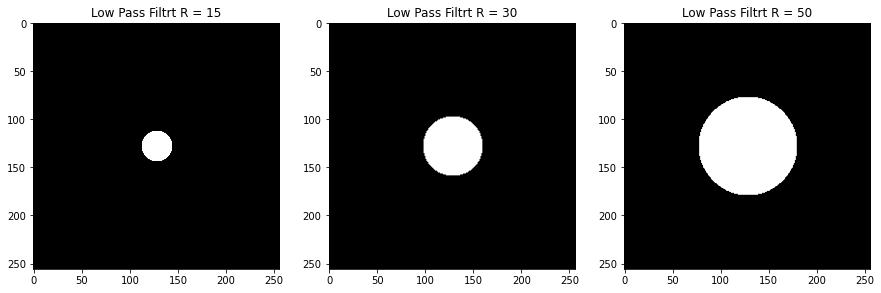

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(L15, cmap='gray')
axs[0].title.set_text('Low Pass Filtrt R = 15')
axs[1].imshow(L30, cmap='gray')
axs[1].title.set_text('Low Pass Filtrt R = 30')
axs[2].imshow(L50, cmap='gray')
axs[2].title.set_text('Low Pass Filtrt R = 50')

In [11]:
L_R15 = np.fft.fftshift(out)*L15
L_R30 = np.fft.fftshift(out)*L30
L_R50 = np.fft.fftshift(out)*L50

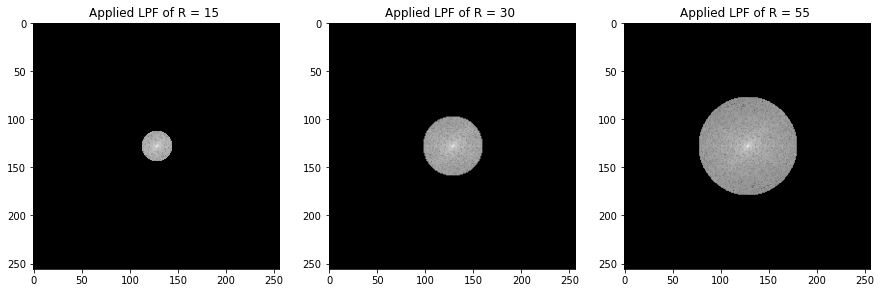

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(np.log(1 + np.abs(L_R15)), cmap='gray')
axs[0].title.set_text('Applied LPF of R = 15 ')
axs[1].imshow(np.log(1 + np.abs(L_R30)), cmap='gray')
axs[1].title.set_text('Applied LPF of R = 30 ')
axs[2].imshow(np.log(1 + np.abs(L_R50)), cmap='gray')
axs[2].title.set_text('Applied LPF of R = 55 ')

In [14]:
def InvFFT1D(x):
    s1 = x.copy()
    #Psedo-reverse 1 to N-1
    s1[1:] = s1[:0:-1]
    InvFFT1D = FFT1D(s1)/s1.shape[0]
    return InvFFT1D

In [15]:
def InvFFT2D(a):
    if a.shape[0]==1:
        return a
    out = np.zeros_like(a,dtype='complex64')
    #Row-Wise
    for i in range(a.shape[0]):
        out[i] = InvFFT1D(a[i])
    #Col-Wise
    for i in range(out.shape[1]):
        out[:,i] = InvFFT1D(out[:,i])
    Inv2D = np.real(out)
    return Inv2D

In [16]:
reGain15 = InvFFT2D(np.fft.fftshift(L_R15)).real
reGain30 = InvFFT2D(np.fft.fftshift(L_R30)).real
reGain50 = InvFFT2D(np.fft.fftshift(L_R50)).real

In [17]:
reGain15 = reGain15[:imgg.shape[0],:imgg.shape[1]]
reGain30 = reGain30[:imgg.shape[0],:imgg.shape[1]]
reGain50 = reGain50[:imgg.shape[0],:imgg.shape[1]]

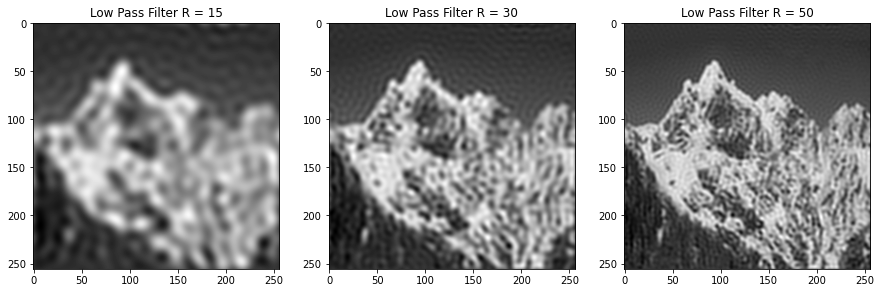

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(reGain15, cmap='gray')
axs[0].title.set_text('Low Pass Filter R = 15')
axs[1].imshow(reGain30, cmap='gray')
axs[1].title.set_text('Low Pass Filter R = 30')
axs[2].imshow(reGain50, cmap='gray')
axs[2].title.set_text('Low Pass Filter R = 50')

## Part 2

### <b>Part 2</b>

In [21]:
def gaussFilt(img,D):
    filt = np.zeros_like(img,dtype='complex64')
    filD = filt.copy()
    R,C = np.shape(img)
    
    for r in range(R):
        for c in range(C):
            filD[r,c] = np.sqrt(r**2 + c**2)
    
    for i in range(R):
        for j in range(C):
            val = filD[np.abs(i - (img.shape[0]//2)),np.abs(j - (img.shape[1]//2))]
            filt[i,j] = np.exp(-(val**2)/(2*D**2))*img[i,j]


    return filt

In [22]:
LG15 = gaussFilt(np.fft.fftshift(out),15)
LG30 = gaussFilt(np.fft.fftshift(out),30)
LG50 = gaussFilt(np.fft.fftshift(out),50)

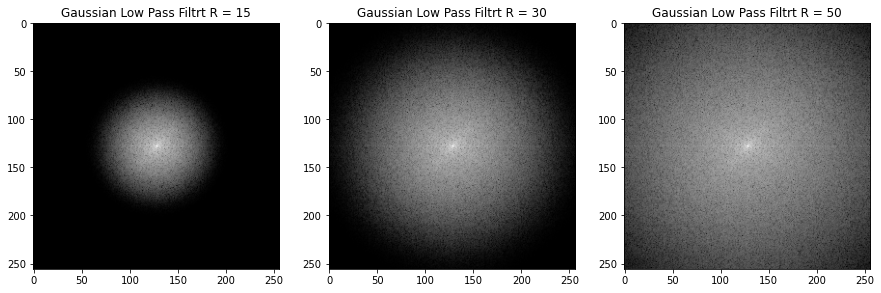

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(np.log(1 + np.abs(LG15)), cmap='gray')
axs[0].title.set_text('Gaussian Low Pass Filtrt R = 15')
axs[1].imshow(np.log(1 + np.abs(LG30)), cmap='gray')
axs[1].title.set_text('Gaussian Low Pass Filtrt R = 30')
axs[2].imshow(np.log(1 + np.abs(LG50)), cmap='gray')
axs[2].title.set_text('Gaussian Low Pass Filtrt R = 50')

In [24]:
GreGain15 = InvFFT2D(np.fft.fftshift(LG15)).real
GreGain30 = InvFFT2D(np.fft.fftshift(LG30)).real
GreGain50 = InvFFT2D(np.fft.fftshift(LG50)).real

In [25]:
GreGain15 = GreGain15[:imgg.shape[0],:imgg.shape[1]]
GreGain30 = GreGain30[:imgg.shape[0],:imgg.shape[1]]
GreGain50 = GreGain50[:imgg.shape[0],:imgg.shape[1]]

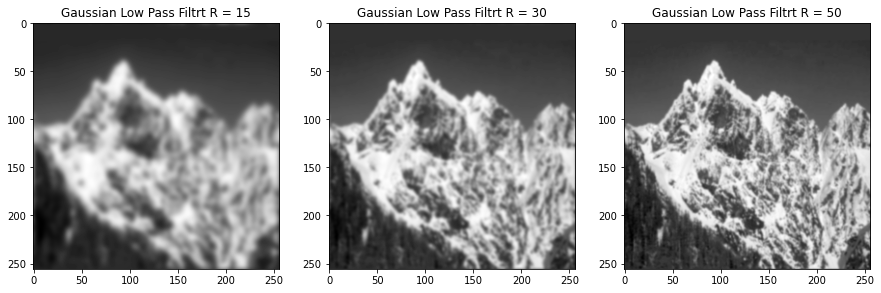

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(GreGain15, cmap='gray')
axs[0].title.set_text('Gaussian Low Pass Filtrt R = 15')
axs[1].imshow(GreGain30, cmap='gray')
axs[1].title.set_text('Gaussian Low Pass Filtrt R = 30')
axs[2].imshow(GreGain50, cmap='gray')
axs[2].title.set_text('Gaussian Low Pass Filtrt R = 50')

### <b>Part 3</b>

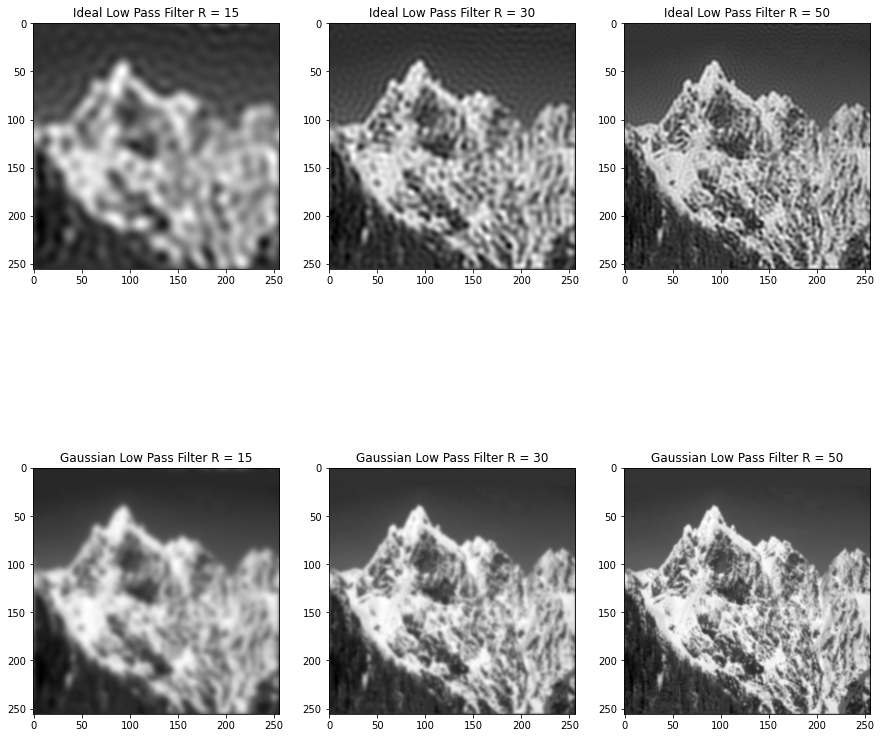

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(15,15))
axs[0][0].imshow(reGain15, cmap='gray')
axs[0][0].title.set_text('Ideal Low Pass Filter R = 15')
axs[0][1].imshow(reGain30, cmap='gray')
axs[0][1].title.set_text('Ideal Low Pass Filter R = 30')
axs[0][2].imshow(reGain50, cmap='gray')
axs[0][2].title.set_text('Ideal Low Pass Filter R = 50')
axs[1][0].imshow(GreGain15, cmap='gray')
axs[1][0].title.set_text('Gaussian Low Pass Filter R = 15')
axs[1][1].imshow(GreGain30, cmap='gray')
axs[1][1].title.set_text('Gaussian Low Pass Filter R = 30')
axs[1][2].imshow(GreGain50, cmap='gray')
axs[1][2].title.set_text('Gaussian Low Pass Filter R = 50')

### Observations:
In ideal low pass filtering, there is a sharp cutoff which results in frequencies being cutoff abruptly causing lots of loss of information. <br>
But in gaussian low pass filtering, there is a gradual cutoff due to which we obtain a proper blurred version without too much loss of information like the ideal LPF case